## 05 Model Evaluation

#### Import relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
from joblib import dump, load

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import mean_absolute_error, mean_squared_error from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Load model_fit file

In [3]:
input_dir = os.path.join('..', 'data', 'processed')
plots_dir = os.path.join('..', 'data', 'figures')
lin_model = load(os.path.join(input_dir, 'lin_model_3.joblib'))
rf_model = load(os.path.join(input_dir, 'forest_model_1.joblib'))
nnet_model = load(os.path.join(input_dir, 'neural_model_1.joblib'))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Ra

#### Load in test and train data

In [4]:
X_train = pd.read_csv(os.path.join(input_dir, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(input_dir, 'X_test.csv'))
y_train = np.array(pd.read_csv(os.path.join(input_dir, 'y_train.csv'))['target'])
y_test = np.array(pd.read_csv(os.path.join(input_dir, 'y_test.csv'))['target'])

In [5]:
X_train = X_train.rename(columns={
    'c09_other_wires': 'c09',
    'c09_restructured': 'c09b',
    'c09_vert_int': 'c09c',
    
})
X_test = X_test.rename(columns={
    'c09_other_wires': 'c09',
    'c09_restructured': 'c09b',
    'c09_vert_int': 'c09c',
    
})

#### Predict on test set using trained models

In [6]:
y_pred_lin = lin_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nnet = nnet_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- c09
- c09b
- c09c
Feature names seen at fit time, yet now missing:
- c09_other_wires
- c09_restructured
- c09_vert_int

  warnings.warn(message, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- c09
- c09b
- c09c
Feature names seen at fit time, yet now missing:
- c09_other_wires
- c09_restructured
- c09_vert_int

  warnings.warn(message, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those tha

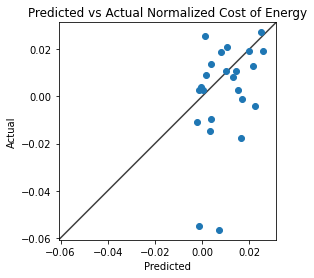

In [19]:
lin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})

fig, ax = plt.subplots()
ax.scatter(y_pred_lin, y_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Predicted vs Actual Normalized Cost of Energy')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig(os.path.join(plots_dir, 'actual_vs_pred_scatter.png'), dpi=300)

#### Compute fit statistics

(a) Bias := $\sum (\hat{y_i} - y_i) $

In [8]:
bias_lin = sum(y_pred_lin - y_test)
bias_rf = sum(y_pred_rf - y_test)

print("Bias of Linear Regression: {}".format(bias_lin))
print("Bias of Random Forest: {}".format(bias_rf))

Bias of Linear Regression: 0.19555686849654202
Bias of Random Forest: 0.21174696211228383


(b) Mean Absolute Error := $\frac{1}{n} \sum |\hat{y_i} - y_i|$

In [9]:
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("MAE of Linear Regression: {}".format(mae_lin))
print("MAE of Random Forest Model: {}".format(mae_rf))

MAE of Linear Regression: 0.014556386218799818
MAE of Random Forest Model: 0.014976130074430724


(c) Root Mean Square Error := $\sqrt{\frac{1}{n} \sum (\hat{y_i} - y_i)^2}$

In [10]:
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("RMSE of Linear Regression: {}".format(rmse_lin))
print("RMSE of Random Forest: {}".format(rmse_rf))

RMSE of Linear Regression: 0.02145142964189743
RMSE of Random Forest: 0.02080203210141882


(d) R squared := $1 - \frac{RSS}{TSS}$ := $1- \frac{\sum (\hat{y_i}-y_i)^2}{\sum (y_i - \mu)^2}$

In [11]:
r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)

print("R^2 of Linear Regression: {}".format(r2_lin))
print("R^2 of Random Forest: {}".format(r2_rf))

R^2 of Linear Regression: -0.0402421137196618
R^2 of Random Forest: 0.0217869012495302


#### Coefficient value estimates, p-values and std error for each feature variable

In [12]:
results = pd.DataFrame({
    'variables': X_train.columns,
    'coeff': lin_model.coef_,
})
results

,variables,coeff
0,x01,-0.003971
1,x02,0.001276
2,x03,0.004973
3,x04,-0.000515
4,x05,0.002348
5,x06,-0.000128
6,x07,0.003254
7,x08,-0.005893
8,c09,-0.033565
9,c09b,-0.028773


Train fit analysis from OLS statsmodel package

In [13]:
import statsmodels.api as sm

In [14]:
X2_train = sm.add_constant(X_train)
ols_result = sm.OLS(y_train, X2_train).fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.602
Date:                Wed, 11 May 2022   Prob (F-statistic):              0.114
Time:                        18:34:44   Log-Likelihood:                 214.54
No. Observations:                  92   AIC:                            -405.1
Df Residuals:                      80   BIC:                            -374.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.028      1.457      0.149      -0.015       0.098
x01           -0.0040      0.004     -0.944      0.348      -0.012       0.004
x02            0.0013      0.004      0.322      0.748      -0.007       0.009
x03            0.0050      0.003      1.612      0.111      -0.001       0.011
x04           -0.0005      0.003     -0.185      0.854      -0.006       0.005
x05            0.0023      0.004      0.641      0.523      -0.005       0.010
x06           -0.0001      0.004     -0.036      0.972      -0.007       0.007
x07            0.0033      0.003      1.049      0.297      -0.003       0.009
x08           -0.0059      0.004     -1.491      0.140      -0.014       0.002
c09           -0.0336      0.030     -1.133      0.261      -0.093       0.025
c09b          -0.0288      0.031     -0.938      0.351      -0.090       0.032
c09c          -0.0332      0.029     -1.158      0.250      -0.090       0.024
==============================================================================
Omnibus:                       23.677   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.495
Skew:                           0.532   Prob(JB):                     1.13e-26
Kurtosis:                       8.481   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Partial dependence plots